# Implementação do MLP

## 1. Importando bibliotecas

In [979]:
import os
import sys
import torch
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# from src.utils.model_io import save_model, load_model
from src.models.mlp import MLP

## 2. Importando datasets

In [980]:
# Organizando variáveis e evitando sobrescrita
datasets = {}

def load_dataset(name, train_path, test_path, val_path=None):
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)

    if val_path is not None:
        df_val = pd.read_csv(val_path)

        datasets[name] = {
            "X_train": df_train.drop("label", axis=1).values,
            "X_val": df_val.drop("label", axis=1).values,
            "y_train": df_train["label"].values.reshape(1, -1).T,
            "y_val": df_val["label"].values.reshape(1, -1).T,
            "X_test": df_test.drop("label", axis=1).values,
            "y_test": df_test["label"].values.reshape(1, -1).T
        }
    else:
        datasets[name] = {
        "X_train": df_train.drop("label", axis=1).values,
        "y_train": df_train["label"].values.reshape(1, -1).T,
        "X_test": df_test.drop("label", axis=1).values,
        "y_test": df_test["label"].values.reshape(1, -1).T
        }


def print_dataset_shapes(datasets):
    for dataset_name, data in datasets.items():
        print(f"\n--- shape {dataset_name} ---")
        
        print(f"X_train: {data['X_train'].shape}")
        print(f"y_train: {data['y_train'].shape}")
        
        print(f"X_test: {data['X_test'].shape}")
        print(f"y_test: {data['y_test'].shape}")
        
        if 'X_val' in data:
            print(f"X_val: {data['X_val'].shape}")
            print(f"y_val: {data['y_val'].shape}")

In [981]:
load_dataset("dataset1", "../data/raw/train_dataset1.csv", "../data/raw/test_dataset1.csv")
load_dataset("dataset2", "../data/raw/train_dataset2.csv", "../data/raw/test_dataset2.csv")
load_dataset("dataset4", "../data/raw/train_dataset4.csv", "../data/raw/test_dataset4.csv", "../data/raw/validation_dataset4.csv")

# ------- Dataset #1 -------
X_train_1 = datasets["dataset1"]["X_train"]
y_train_1 = datasets["dataset1"]["y_train"]
X_test_1 = datasets["dataset1"]["X_test"]
y_test_1 = datasets["dataset1"]["y_test"]

# ------- Dataset #2 -------
X_train_2 = datasets["dataset2"]["X_train"]
y_train_2 = datasets["dataset2"]["y_train"]
X_test_2 = datasets["dataset2"]["X_test"]
y_test_2 = datasets["dataset2"]["y_test"]

# ------- Dataset #4 -------
X_train_4 = datasets["dataset4"]["X_train"]
y_train_4 = datasets["dataset4"]["y_train"]
X_test_4 = datasets["dataset4"]["X_test"]
y_test_4 = datasets["dataset4"]["y_test"]
X_val_4 = datasets["dataset4"]["X_val"]
y_val_4 = datasets["dataset4"]["y_val"]

print_dataset_shapes(datasets)


--- shape dataset1 ---
X_train: (140, 2)
y_train: (140, 1)
X_test: (60, 2)
y_test: (60, 1)

--- shape dataset2 ---
X_train: (175, 2)
y_train: (175, 1)
X_test: (75, 2)
y_test: (75, 1)

--- shape dataset4 ---
X_train: (768, 50)
y_train: (768, 1)
X_test: (240, 50)
y_test: (240, 1)
X_val: (192, 50)
y_val: (192, 1)


## Análise dos datasets

### Dataset #1

In [982]:
# Razão de treino e teste
print("Razão de treino: ", X_train_1.shape[0]/(X_train_1.shape[0] + X_test_1.shape[0]))
print("Razão de teste: ", X_test_1.shape[0]/(X_train_1.shape[0] + X_test_1.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


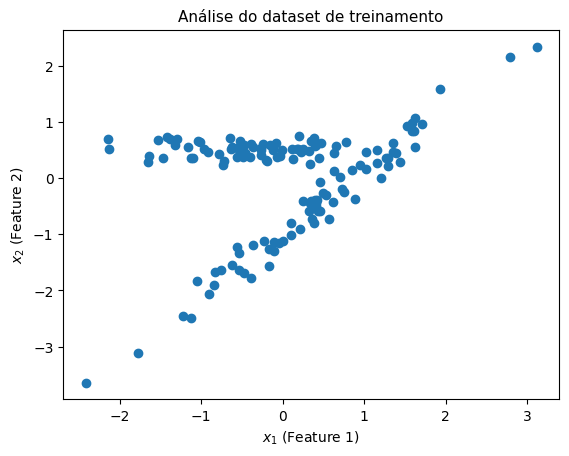

In [983]:
# Plot dos dados de treinamento
X_train_T = X_train_1.T
plt.scatter(X_train_T[0], X_train_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de treinamento", fontsize=11)
plt.show()

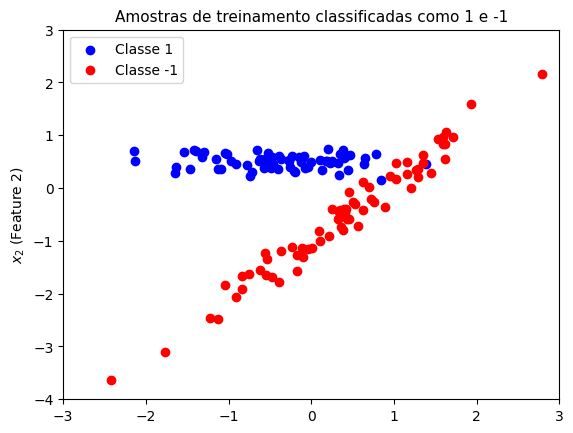

In [984]:
# Plot dos dados de treinamento
df1_treino_classe_1 = X_train_1[y_train_1.flatten() == 1]          # amostras da classe 1
df1_treino_classe_menos_1 = X_train_1[y_train_1.flatten() == -1]     # amostras da classe -1

plt.scatter(df1_treino_classe_1[:, 0], df1_treino_classe_1[:, 1], color='blue', label='Classe 1')
plt.scatter(df1_treino_classe_menos_1[:, 0], df1_treino_classe_menos_1[:, 1], color='red', label='Classe -1')
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de treinamento classificadas como 1 e -1", fontsize=11)
plt.xlim(-3, 3)
plt.ylim(-4, 3)
plt.legend()
plt.show()

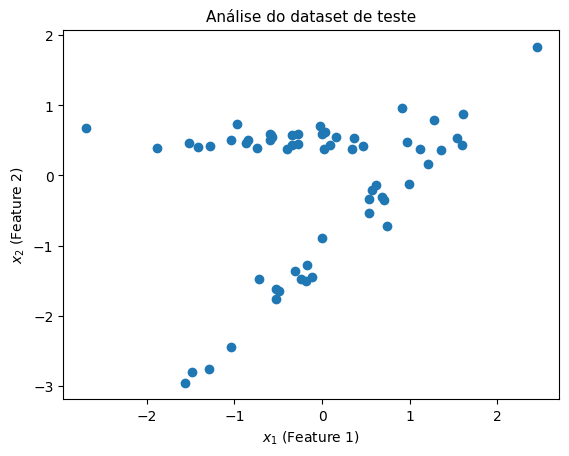

In [985]:
# Plot dos dados de teste
X_test_T = X_test_1.T
plt.scatter(X_test_T[0], X_test_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de teste", fontsize=11)
plt.show()

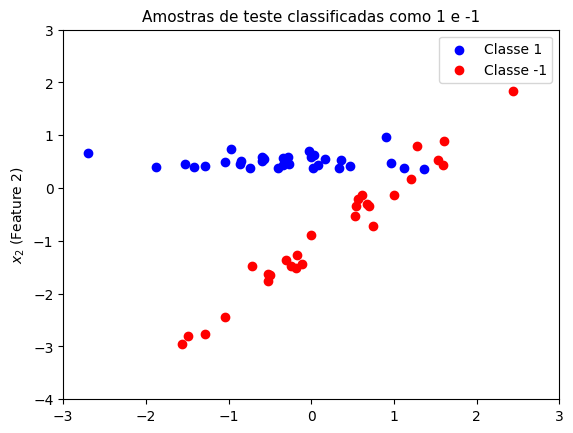

In [986]:
# Plot dos dados de teste
df1_teste_classe_1 = X_test_1[y_test_1.flatten() == 1]          # amostras da classe 1
df1_teste_classe_menos_1 = X_test_1[y_test_1.flatten() == -1]     # amostras da classe -1

plt.scatter(df1_teste_classe_1[:, 0], df1_teste_classe_1[:, 1], color='blue', label='Classe 1')
plt.scatter(df1_teste_classe_menos_1[:, 0], df1_teste_classe_menos_1[:, 1], color='red', label='Classe -1')
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de teste classificadas como 1 e -1", fontsize=11)
plt.xlim(-3, 3)
plt.ylim(-4, 3)
plt.legend()
plt.show()

### Dataset #2

In [987]:
# Razão de treino e teste
print("Razão de treino: ", X_train_2.shape[0]/(X_train_2.shape[0] + X_test_2.shape[0]))
print("Razão de teste: ", X_test_2.shape[0]/(X_train_2.shape[0] + X_test_2.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


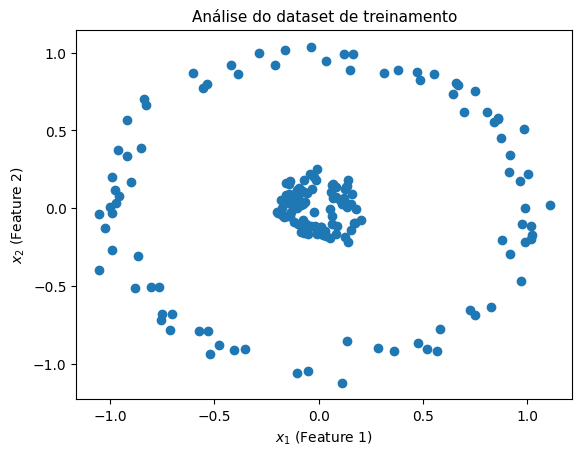

In [988]:
# Plot dos dados de treinamento
X_train_T = X_train_2.T
plt.scatter(X_train_T[0], X_train_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de treinamento", fontsize=11)
plt.show()

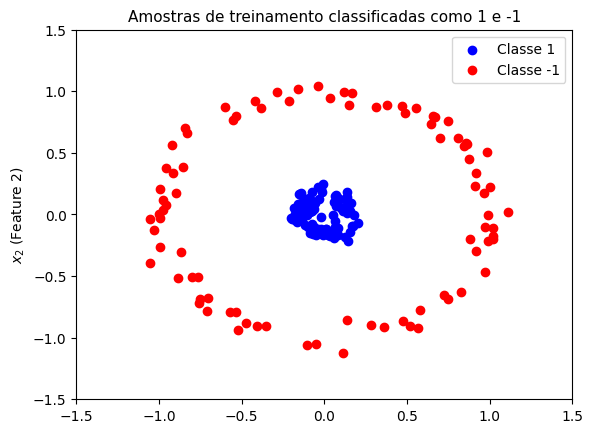

In [989]:
# Plot dos dados de treinamento
df2_treino_classe_1 = X_train_2[y_train_2.flatten() == 1]          # amostras da classe 1
df2_treino_classe_menos_1 = X_train_2[y_train_2.flatten() == -1]     # amostras da classe -1

plt.scatter(df2_treino_classe_1[:, 0], df2_treino_classe_1[:, 1], color='blue', label='Classe 1')
plt.scatter(df2_treino_classe_menos_1[:, 0], df2_treino_classe_menos_1[:, 1], color='red', label='Classe -1')
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de treinamento classificadas como 1 e -1", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

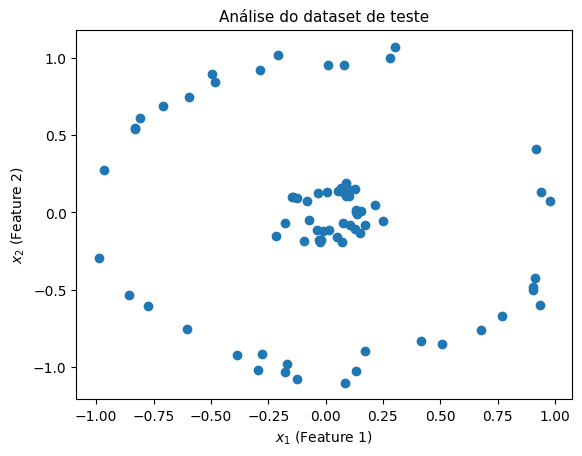

In [990]:
# Plot dos dados de teste
X_test_T = X_test_2.T
plt.scatter(X_test_T[0], X_test_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de teste", fontsize=11)
plt.show()

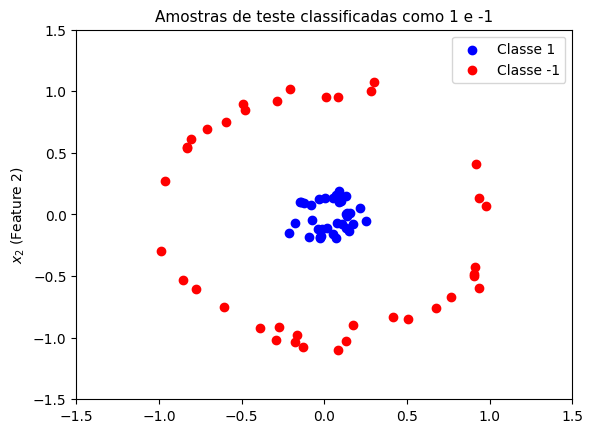

In [991]:
# Plot dos dados de teste
df2_teste_classe_1 = X_test_2[y_test_2.flatten() == 1]          # amostras da classe 1
df2_teste_classe_menos_1 = X_test_2[y_test_2.flatten() == -1]     # amostras da classe -1

plt.scatter(df2_teste_classe_1[:, 0], df2_teste_classe_1[:, 1], color='blue', label='Classe 1')
plt.scatter(df2_teste_classe_menos_1[:, 0], df2_teste_classe_menos_1[:, 1], color='red', label='Classe -1')
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de teste classificadas como 1 e -1", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

### Dataset #4

In [992]:
# Razão de treino e teste
print("Razão de treino: ", X_train_4.shape[0]/(X_train_4.shape[0] + X_test_4.shape[0]))
print("Razão de teste: ", X_test_4.shape[0]/(X_train_4.shape[0] + X_test_4.shape[0]))

Razão de treino:  0.7619047619047619
Razão de teste:  0.23809523809523808


## Treinando o modelo MLP

### Dataset #1

In [993]:
# Convertendo dados para torch.Tensor
X_train_1 = torch.tensor(X_train_1).float()
y_train_1 = torch.tensor(y_train_1).float()
X_test_1 = torch.tensor(X_test_1).float()
y_test_1 = torch.tensor(y_test_1).float()

X_train_1 = X_train_1.detach().clone().float()
y_train_1 = y_train_1.detach().clone().float()
X_test_1 = X_test_1.detach().clone().float()
y_test_1 = y_test_1.detach().clone().float()

# Definindo parâmetros
params_1 = {
    "n_epochs": 100,
    "n_features": X_train_1.shape[1],
    "n_hidden": [10],
    "n_classes": 1,
    "activation": "tanh",
    "learning_rate": 0.001,
    "seed": 16
}

model_dataset_1 = MLP(**params_1)
loss_train_list_1, loss_valid_list_1, accuracy_train_list_1, accuracy_valid_list_1 = model_dataset_1.train_model(X_train_1, y_train_1, optimizer="sgd")

Epoch 1/100 - Train Loss: 0.6495 - Train Accuracy: 68.0000
Epoch 2/100 - Train Loss: 0.6494 - Train Accuracy: 68.0000
Epoch 3/100 - Train Loss: 0.6492 - Train Accuracy: 68.0000
Epoch 4/100 - Train Loss: 0.6491 - Train Accuracy: 68.0000
Epoch 5/100 - Train Loss: 0.6490 - Train Accuracy: 68.0000
Epoch 6/100 - Train Loss: 0.6488 - Train Accuracy: 68.0000
Epoch 7/100 - Train Loss: 0.6487 - Train Accuracy: 68.0000
Epoch 8/100 - Train Loss: 0.6485 - Train Accuracy: 68.0000
Epoch 9/100 - Train Loss: 0.6484 - Train Accuracy: 68.0000
Epoch 10/100 - Train Loss: 0.6482 - Train Accuracy: 68.0000
Epoch 11/100 - Train Loss: 0.6481 - Train Accuracy: 68.0000
Epoch 12/100 - Train Loss: 0.6480 - Train Accuracy: 68.0000
Epoch 13/100 - Train Loss: 0.6478 - Train Accuracy: 68.0000
Epoch 14/100 - Train Loss: 0.6477 - Train Accuracy: 68.0000
Epoch 15/100 - Train Loss: 0.6475 - Train Accuracy: 68.0000
Epoch 16/100 - Train Loss: 0.6474 - Train Accuracy: 68.0000
Epoch 17/100 - Train Loss: 0.6472 - Train Accurac

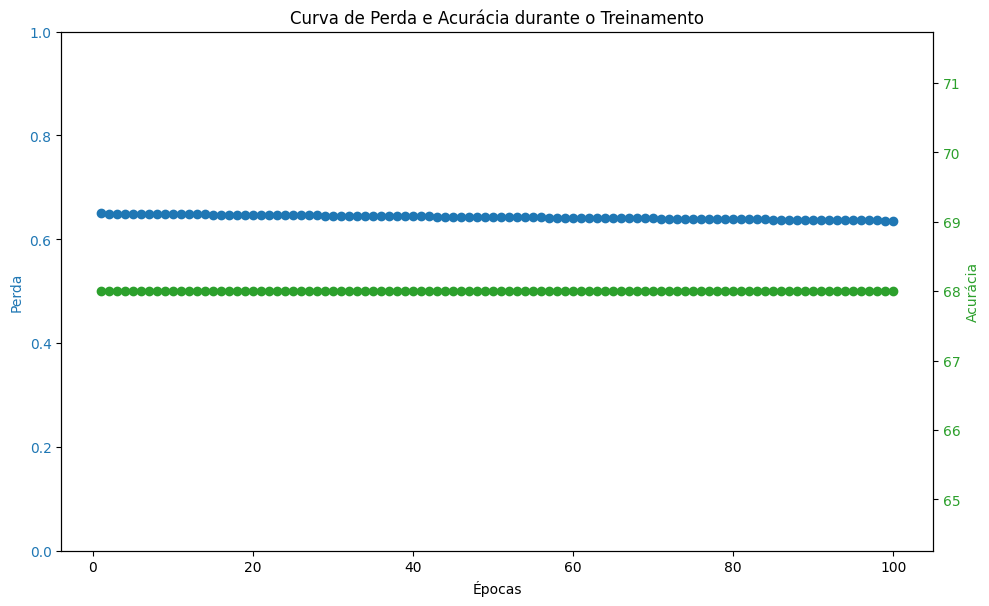

In [ ]:
# Curva de perda e acurácia no treinamento
epochs = range(1, params_1["n_epochs"] + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Perda', color='tab:blue')
ax1.set_ylim(0, 1)
ax1.plot(epochs, loss_train_list_1, label='Perda Treinamento', color='tab:blue', linestyle='-', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Acurácia', color='tab:green')
ax2.plot(epochs, accuracy_train_list_1, label='Acurácia Treinamento', color='tab:green', linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.tight_layout()
plt.title('Curva de Perda e Acurácia durante o Treinamento')
plt.show()

In [995]:
# Predição
acc_1 = model_dataset_1.evaluate_accuracy(X_test_1, y_test_1)
print(f"\nAcurácia no teste: {acc_1:.4f}")


Acurácia no teste: 0.5333


#### Fronteira de decisão dos dados de teste

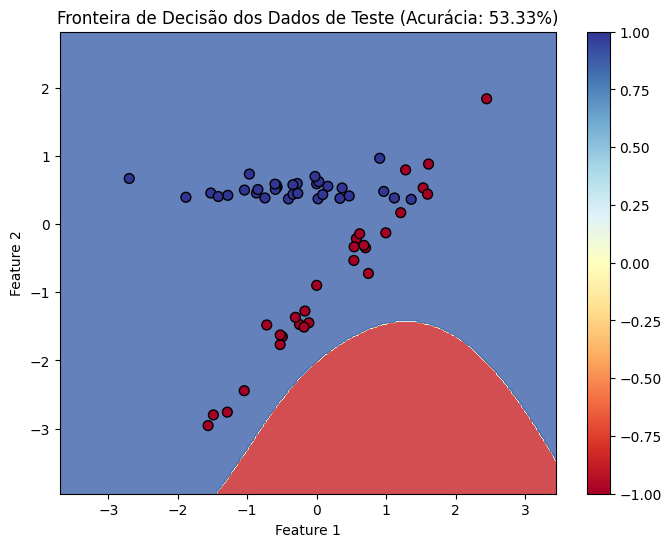

In [996]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_dataset_1.eval()
with torch.no_grad():
    y_pred = model_dataset_1.forward(X_test_1)
    y_pred = torch.sigmoid(y_pred).squeeze()
    y_pred = (y_pred > 0.5).float()

h = .02
x_min, x_max = X_test_1[:, 0].min() - 1, X_test_1[:, 0].max() + 1
y_min, y_max = X_test_1[:, 1].min() - 1, X_test_1[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), indexing='ij')

grid_points = torch.tensor(np.column_stack([xx.ravel(), yy.ravel()]), dtype=torch.float32)

with torch.no_grad():
    Z = model_dataset_1.forward(grid_points) 
    Z = torch.sigmoid(Z).squeeze()
    Z = (Z > 0.5).float()

Z = Z.numpy().reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], c=y_test_1, s=50, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title(f"Fronteira de Decisão dos Dados de Teste (Acurácia: {acc_1 * 100:.2f}%)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

#### Resultados observados

Uma NLP é feita para capturar relações não lineares complexas e, em problemas como visto no dataset #1, que possui dados simples e linearmente separáveis, ela não se torna eficaz. Por isso, o Perceptron ou ADALINE que foram implementados anteriormente são as melhores opções para esse tipo de dado.

### Dataset #2

In [ ]:
# Convertendo dados para torch.Tensor
X_train_2 = torch.tensor(X_train_2).float()
y_train_2 = torch.tensor(y_train_2).float()
X_test_2 = torch.tensor(X_test_2).float()
y_test_2 = torch.tensor(y_test_2).float()

# Normalização
y_train_2 = torch.where(y_train_2 == -1, torch.tensor(0), torch.tensor(1))
y_test_2 = torch.where(y_test_2 == -1, torch.tensor(0), torch.tensor(1))

X_train_2 = X_train_2.detach().clone().float()
y_train_2 = y_train_2.detach().clone().float()
X_test_2 = X_test_2.detach().clone().float()
y_test_2 = y_test_2.detach().clone().float()

# Definindo parâmetros
params_2 = {
    "n_epochs": 100,
    "n_features": X_train_2.shape[1],
    "n_hidden": [64, 32],
    "n_classes": 1,
    "activation": "relu",
    "learning_rate": 0.001,
    "dropout": 0.2,
    "weight_decay": 0.001,
    "seed": 16
}

model_dataset_2 = MLP(**params_2)
loss_train_list_2, loss_valid_list_2, accuracy_train_list_2, accuracy_valid_list_2 = model_dataset_2.train_model(X_train_2, y_train_2, optimizer="adam")

Epoch 1/100 - Train Loss: 0.6889 - Train Accuracy: 87.1543
Epoch 2/100 - Train Loss: 0.6865 - Train Accuracy: 87.1886
Epoch 3/100 - Train Loss: 0.6846 - Train Accuracy: 87.2229
Epoch 4/100 - Train Loss: 0.6782 - Train Accuracy: 87.2857
Epoch 5/100 - Train Loss: 0.6767 - Train Accuracy: 87.3143
Epoch 6/100 - Train Loss: 0.6739 - Train Accuracy: 87.3086
Epoch 7/100 - Train Loss: 0.6745 - Train Accuracy: 87.4114
Epoch 8/100 - Train Loss: 0.6680 - Train Accuracy: 87.4000
Epoch 9/100 - Train Loss: 0.6610 - Train Accuracy: 87.4914
Epoch 10/100 - Train Loss: 0.6570 - Train Accuracy: 87.4914
Epoch 11/100 - Train Loss: 0.6563 - Train Accuracy: 87.5143
Epoch 12/100 - Train Loss: 0.6534 - Train Accuracy: 87.5257
Epoch 13/100 - Train Loss: 0.6507 - Train Accuracy: 87.5543
Epoch 14/100 - Train Loss: 0.6557 - Train Accuracy: 87.5029
Epoch 15/100 - Train Loss: 0.6471 - Train Accuracy: 87.5257
Epoch 16/100 - Train Loss: 0.6420 - Train Accuracy: 87.5771
Epoch 17/100 - Train Loss: 0.6420 - Train Accurac

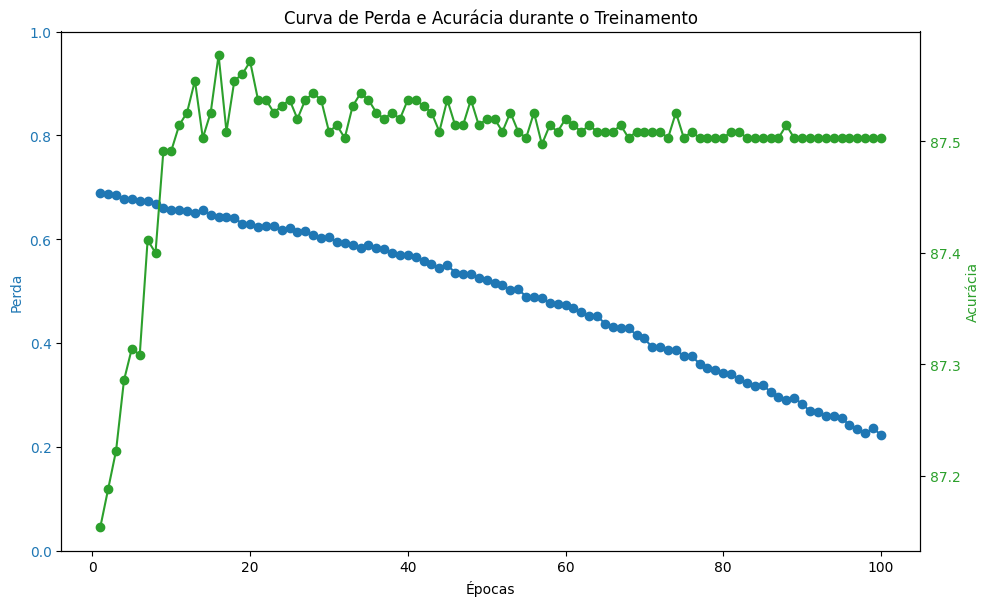

In [ ]:
# Curva de perda e acurácia no treinamento
epochs = range(1, params_2["n_epochs"] + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Perda', color='tab:blue')
ax1.set_ylim(0, 1)
ax1.plot(epochs, loss_train_list_2, label='Perda Treinamento', color='tab:blue', linestyle='-', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Acurácia', color='tab:green')
ax2.plot(epochs, accuracy_train_list_2, label='Acurácia Treinamento', color='tab:green', linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:green')
fig.tight_layout()
plt.title('Curva de Perda e Acurácia durante o Treinamento')
plt.show()

In [999]:
# Predição
acc_2 = model_dataset_2.evaluate_accuracy(X_test_2, y_test_2)
print(f"Acurácia no teste: {acc_2:.4f}")

Acurácia no teste: 1.0000


#### Fronteira de decisão dos dados de teste

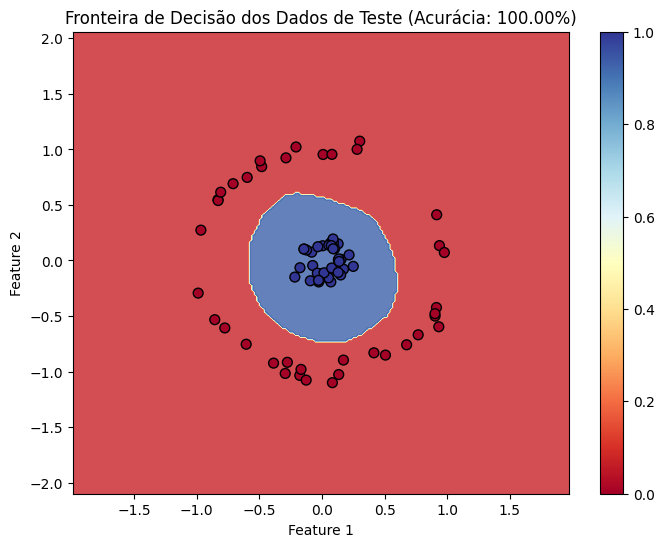

In [1000]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_dataset_2.eval()
with torch.no_grad():
    y_pred = model_dataset_2.forward(X_test_2)
    y_pred = torch.sigmoid(y_pred).squeeze()
    y_pred = (y_pred > 0.5).float()

h = .02
x_min, x_max = X_test_2[:, 0].min() - 1, X_test_2[:, 0].max() + 1
y_min, y_max = X_test_2[:, 1].min() - 1, X_test_2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), indexing='ij')

grid_points = torch.tensor(np.column_stack([xx.ravel(), yy.ravel()]), dtype=torch.float32)

with torch.no_grad():
    Z = model_dataset_2.forward(grid_points) 
    Z = torch.sigmoid(Z).squeeze()
    Z = (Z > 0.5).float()

Z = Z.numpy().reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test_2[:, 0], X_test_2[:, 1], c=y_test_2, s=50, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title(f"Fronteira de Decisão dos Dados de Teste (Acurácia: {acc_2 * 100:.2f}%)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

#### Resultados observados

A acurácia de 100% no conjunto de teste demonstra que os dados de teste possuem a mesma característica de separabilidade (perfeita) observada nos dados de treinamento. Já a acurácia do treinamento estagnada em ~87.5% pode indicar que o modelo está "tolerando" alguns erros no treino por conta dos parâmetros de regularização. De modo geral, o conjunto de dados do dataset #2 é perfeitamente separável, sendo um trabalho "facil" para o MLP e por isso ele apresentou esses resultados.

# Referências

- https://machinelearningmastery.com/building-multilayer-perceptron-models-in-pytorch/;
- https://medium.com/@mn05052002/building-a-simple-mlp-from-scratch-using-pytorch-7d50ca66512b;
- https://machinelearningmastery.com/implementing-gradient-descent-in-pytorch/;
- https://www.codecademy.com/resources/docs/pytorch/optimizers/adam;
- https://www.geeksforgeeks.org/training-neural-networks-with-validation-using-pytorch/;
- https://medium.com/biased-algorithms/a-practical-guide-to-implementing-early-stopping-in-pytorch-for-model-training-99a7cbd46e9d;
- https://medium.com/dejunhuang/learning-day-57-practical-5-loss-function-crossentropyloss-vs-bceloss-in-pytorch-softmax-vs-bd866c8a0d23;
- https://saturncloud.io/blog/calculating-the-accuracy-of-pytorch-models-every-epoch/#2;
- https://pt.d2l.ai/chapter_preface/index.html;
- https://sentry.io/answers/get-the-last-element-of-a-list-in-python/;
- https://pytorch.org/docs/stable/generated/torch.nn.ModuleList.html;